## __MCMC Warm-up__

### __1. Estimating $\pi$ with a dartboard__

__An algorithm is _Monte Carlo_ when it uses repeated draws from a _random variable_ $X$ to estimate (some statistic or value derived from) $X$.__ 
1. __Construct a discrete Markov chain $(X_t)_{t=1}^n$, where $X_t$ is the dart thrown at time $1\leq t\leq N$. Rigorously describe the distribution from which $X_t$ is drawn.__

Let the board be the square $$\mathcal{D}=[-\pi,\pi]\times [-\pi,\pi]$$ with the circle $$\mathcal{C}=\{(x,y): x^2+y^2\leq \pi^2\}$$

Define the chain $$X_t=(U_t,V_t)\in \mathcal{D}, \quad t=1,2,\dots, N,$$ where $(U_t,V_t)\sim \mathrm{Unif}(\mathcal{D})$ 

For any measurable set $\mathcal{A}\subseteq \mathcal{D}$, $$\mathrm{Pr}(X_{t+1}\in \mathcal{A}\mid X_t=x)=\mathrm{Pr}(X_{t+1}\in \mathcal{A})=\frac{\mathrm{Area}(\mathcal{A})}{\mathrm{Area}(\mathcal{D})}$$So the trainsition kernel does not depend on the current state $x$, which makes $X_t$ is a discrete-time Markov chain.

2. __Write down an equation that relates the area of $\mathcal{D}$ to its inscribed circle. How can you approximate the relationship between the areas using $(X_t)$? Figure out a way to isolate an estimate for $\pi$ at each time $t$.__

We have $$\mathrm{Area}(\mathcal{C})=\pi^3=\frac{\pi}{4}\cdot 4\pi^2=\frac{\pi}{4}\mathrm{Area}(\mathcal{D})$$

Since our chain $X_t$ is constructed so that it is drawn uniformly on $\mathcal{D}$, then for a uniform random point $X\sim \mathrm{Unif}(D)$, $$\mathrm{Pr}(X\in \mathcal{C})=\frac{\mathrm{Area}(\mathcal{C})}{\mathrm{Area}(\mathcal{D})}$$

Define $$H_t=\mathbf{1}_\mathcal{C}(X_t)=\begin{cases}1, & X\in \mathcal{C}\\0,& X\not \in \mathcal{C}\end{cases}$$

Then $H_t$ is a Bernoulli distribution with $p=\frac{\mathrm{Area}(\mathcal{C})}{\mathrm{Area}(\mathcal{D})}$, so $$\mathbb{E}[H_t]=p=\frac{\mathrm{Area}(\mathcal{C})}{\mathrm{Area}(\mathcal{D})}\implies \mathrm{Area}(\mathcal{C})=\mathrm{Area}(\mathcal{D})\cdot \mathbb{E}[H_t]$$

Since $X_t$ are i.i.d. uniform throws, by the Law of Large Numbers, $$\frac{1}{N}\sum_{t=1}^N H_t\approx \mathbb{E}[H_t]$$

So we have $$\widehat{\mathrm{Area}}(\mathcal{C})\approx\mathrm{Area}(\mathcal{D})\cdot \frac{1}{N}\sum_{t=1}^N \mathbf{1}_\mathcal{C}(X_t)$$

We do have $p=\frac{\mathrm{Area}(\mathcal{C})}{\mathrm{Area}(\mathcal{D})}=\frac{\pi}{4}\implies \pi=4p$, estimate $p$ by $\hat{p}_t$ will lead to $$\hat{\pi}=4\hat{p}=4\left(\frac{1}{N}\sum_{t=1}^N H_t\right)$$

Then the time-$t$ estimator is $$\begin{aligned}\hat{\pi}_t= &\,4\left(\frac{1}{t}\sum_{k=1}^t H_k\right)=\frac{4}{t}\left(H_t+\sum_{k=1}^{t-1}H_k\right)=\frac{4}{t}\left(H_t+\frac{t-1}{4}\hat{\pi}_{t-1}\right)\\=&\left(1-\frac{1}{t}\right)\hat{\pi}_{t-1}+\frac{4}{t}H_t\end{aligned}$$

3. __Write a short program to simulate $(X_t)$.__

In [13]:
import math
import random

def simulate_X_t(R=1.0):
    """Simulate a discrete Markov chain (X_t)_{t=1}^N, where X_t is the dart
    thrown at time 1<=t<=N. 
    """
    U_t = random.uniform(-R, R)
    V_t = random.uniform(-R, R)
    return (U_t, V_t)

4. __Create a plot that shows the evolution of your estimate over time. How big does N have to be for your estimate to be within $\epsilon=\frac{1}{100}$ of $\pi$'s true value? $\epsilon=\frac{1}{1000}$?__

In [34]:
import matplotlib.pyplot as plt

def H_t(x, y, R=1.0):
    """Check if the point (x, y) is inside the defined circle."""
    return x**2 + y**2 <= R**2 

def estimate_pi(Nmax, R=1.0, seed = None):
    """Estimate the value of pi using N dart throws."""
    if seed is not None:
        random.seed(seed)
    pi_hat = 0.0
    path = []
    for t in range(1, Nmax + 1):
        x, y = simulate_X_t(R)
        H = H_t(x, y, R)
        pi_hat = (1 - 1/t) * pi_hat + (4/t) * H
        path.append(pi_hat)
    return pi_hat, path

def plot_estimate_evolution(N=10000, R=1.0, seed=42):
    """Plot the evolution of the pi estimate over time."""
    final_hat, path = estimate_pi(N, R=R, seed=seed)
    plt.plot(range(1, N + 1), path)
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True value of π')
    plt.xlabel('t')
    plt.ylabel(r'$\hat{\pi}_t$')
    plt.xscale('log')
    plt.title('Evolution of π Estimate Over Time')
    plt.legend()
    plt.show()
    return final_hat

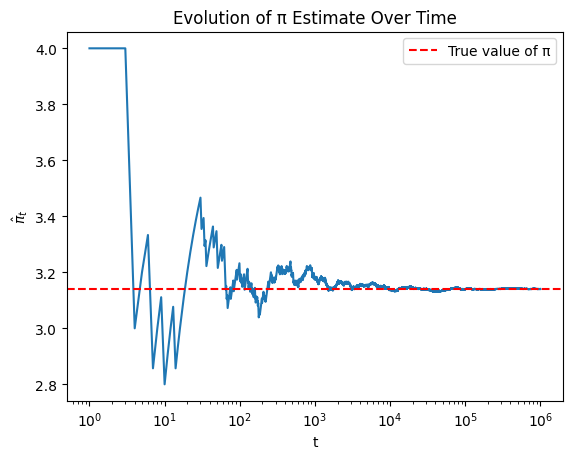

3.1402440000001124


In [35]:
print(plot_estimate_evolution(N=1000000, R=math.pi, seed=42))

In [30]:
def estimate_pi_until(eps, delta=0.05, R=1.0, seed=None, Nmax=1000000000):
    if seed is not None:
        random.seed(seed)

    pi_hat = 0.0
    for t in range(1, Nmax + 1):
        x, y = simulate_X_t(R)
        Ht = H_t(x, y, R)

        pi_hat = (1 - 1/t) * pi_hat + (4/t) * Ht

        # Hoeffding half-width for pi
        bound = 4 * math.sqrt(math.log(2/delta) / (2*t))

        if bound <= eps:
            return t, pi_hat, bound

    return Nmax, pi_hat, bound


In [32]:
Nmax, pi_hat, bound = estimate_pi_until(0.01)
print(f"Stopping time N: {Nmax}")

Stopping time N: 295111


In [31]:
Nmax, pi_hat, bound = estimate_pi_until(0.001)
print(f"Stopping time N: {Nmax}")

Stopping time N: 29511036
